['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
['greedy-ppr-kg-rec', 'greedy-ppr-kg', 'greedy-ppr-joint-rec', 'greedy-ppr-joint', 'greedy-ppr-collab-rec', 'greedy-ppr-collab']


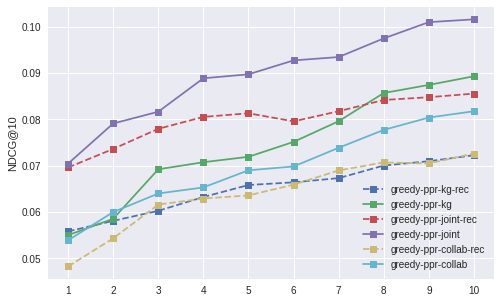

In [6]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, ttest_rel

plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.linewidth'] = 0.8
print(plt.style.available)
plt.style.use('seaborn')

metric = 'ndcg'
cutoff = '10'
n_questions = 10
significance_level = 0.05

data = get(f'https://mindreader.tech/spectate/results/170k_equal_20/{metric}/{cutoff}').json()
#data = get(f'http://localhost:5000/spectate/results/170k_equal/{metric}/{cutoff}').json()

models = sorted([key for key in data.keys()], reverse=True)

print(models)
fig, ax = plt.subplots(figsize=(8, 5))

for model in models:
    x = np.arange(1, 11, 1)
    y = [np.mean(data[model][key- 1]) for key in x]
    
    plt.plot(x, y, label=model, marker='o' if 'pop' in model else 's', linestyle='dashed' if model.endswith('rec') else 'solid')

plt.ylabel(f'{metric.upper()}@{cutoff}')

plt.xticks(x)
plt.legend()
plt.savefig('lineplot.pdf', bbox_inches='tight')
plt.show()